# App Store Analysis

Christopher Garcia

__Date:__ January

__Objective:__ The goal of this project is to practice with different data wranging, data cleaning as well as data analysis/mining techniques. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import and Pre-Processing

In [2]:
# load and inspect data
df = pd.read_csv('appstore_games.csv')
df.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
# check if data is stored as data it represents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [4]:
# check for missing data
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [6]:
# check for duplicates
#df.duplicated()
# no duplciates in this dataset

In [10]:
# remove prefixes for url column
# .str.lstrip('https://') removes the “https://” from the left side of the string
#restaurants['url'] = restaurants['url'].str.lstrip('https://') 
 
# .str.lstrip('www.') removes the “www.” from the left side of the string
#restaurants['url'] = restaurants['url'].str.lstrip('www.') 

In [ ]:
# how are we going to handle missing values
# method 1
# we can drop all rows with missing values
# bill_df = bill_df.dropna()
# this command removes nan values from column
#bill_df = bill_df.dropna(subset=['num_guests'])

# method 2
# we can fill with mean or another aggregate value
# bill_df = bill_df.fillna(value={"bill":bill_df.bill.mean(), "num_guests":bill_df.num_guests.mean()})


In [42]:
# extract relevant data into a new dataframe
ratings = df[['Name', 'Average User Rating', 'Price', 'In-app Purchases', 'Age Rating', 'Primary Genre']]

In [44]:
# rename columns
ratings = ratings.rename({
    'Average User Rating': 'avg_usr_rating',
    'In-app Purchases': 'in_app_purchase',
    'Age Rating': 'age_rating',
    'Primary Genre': 'primary_genre'
}, axis=1)

ratings.head()

,Name,avg_usr_rating,Price,in_app_purchase,age_rating,primary_genre
0,Sudoku,4.0,2.99,NaN,4+,Games
1,Reversi,3.5,1.99,NaN,4+,Games
2,Morocco,3.0,0.00,NaN,4+,Games
3,Sudoku (Free),3.5,0.00,NaN,4+,Games
4,Senet Deluxe,3.5,2.99,NaN,4+,Games


In [45]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 0 to 17006
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17007 non-null  object 
 1   avg_usr_rating   7561 non-null   float64
 2   Price            16983 non-null  float64
 3   in_app_purchase  7683 non-null   object 
 4   age_rating       17007 non-null  object 
 5   primary_genre    17007 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [47]:
# we may have to adjust this column later
# if we run a LogisticRegression, we can use the OrdinalEncoder
# age rating is an ordered column
ratings['age_rating'].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

In [50]:
ratings.isnull().sum()

Name                  0
avg_usr_rating     9446
Price                24
in_app_purchase    9324
age_rating            0
primary_genre         0
dtype: int64

In [56]:
# drop missing values
ratings = ratings.dropna()

I decided to drop all of the rows with missing values due to the fact that we have realively a large sample to work with. I can also change the missing values with the median or mean of their respective columns. However, for now, we'll drop the rows. Since the `age_rating` is an ordinal variable, it is best not to replace with the mean since it will give us a float value. Using the mode would also misclassiy the actual rating of some apps. So it is best to just remove those rows for this project.

### Data Analysis and Visualization

#### [Univariate Analysis]

Now we are going to run summary statistics on the dataset we created to look for different patterns. This will determine a need of whether or not we need to build a predictive model to get an outcome from the dataset. 

[Quantitative Variables]

In [59]:
# numerical summarization
ratings.describe()

,avg_usr_rating,Price
count,4634.000000,4634.000000
mean,4.151489,0.285967
std,0.671432,2.348151
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.500000,0.000000
75%,4.500000,0.000000
max,5.000000,139.990000


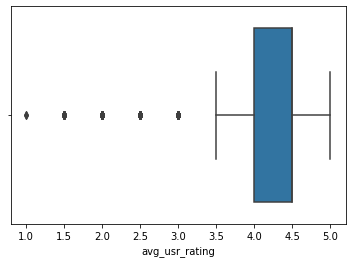

In [63]:
sns.boxplot(data = ratings, x = 'avg_usr_rating')
plt.show()

The boxplot is showing that most of the ratings of an app range around 3.5 and 5 with the majority of the distribution ranging between 4 and 4.5. We also see that we have a couple of apps that score below 3.5.

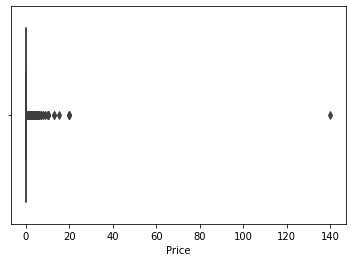

In [66]:
# visualize price
sns.boxplot(data = ratings, x = 'Price')
plt.show()

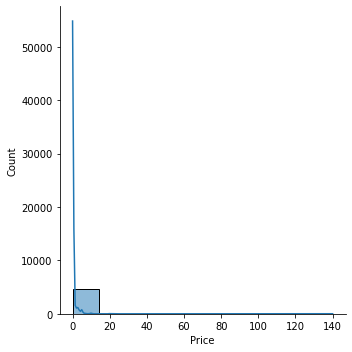

In [72]:
sns.displot(data = ratings, x = 'Price', bins = 10, kde = True)
plt.show()

Clearly most of the apps range from free to no more than five dollars with the exception of a couple outliers. The histogram doesn't tell us much as we are not able to visualize the distribution. However, although you can't see much in the box plot, it clearly indicates that most apps range around 0-5 dollars.

[Categorical Variables]

#### [Bivariate Analysis]

#### [Multivariate Analysis]

### Data Analytics